# Bayesian Inference

- https://medium.com/airy-science/bayesian-inference-with-probabilistic-programming-using-pymc3-a00702ccd9e0

In [1]:
import pymc3 as pm
print(pm.__version__)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


3.11.2


In [2]:
with pm.Model() as coinflip:
    which_coin = pm.Bernoulli('which_coin',0.5)
    theta_biased = pm.Uniform('theta_biased',0,1)
    p = pm.math.switch(which_coin>0.5,0.5,theta_biased)
    heads = pm.Binomial('heads',n=2,p=p,observed=2)
    
    coin_trace = pm.sample(5000,tune=2500)

C:\Users\wallj\AppData\Local\Temp\ipykernel_20288\135176378.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  coin_trace = pm.sample(5000,tune=2500)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [which_coin]
>NUTS: [theta_biased]


Sampling 4 chains for 2_500 tune and 5_000 draw iterations (10_000 + 20_000 draws total) took 22 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


C:\Users\wallj\AppData\Local\Temp\ipykernel_20288\2531964344.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(coin_trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\wallj\anaconda3\envs\pymc4\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'which_coin'}>,
        <AxesSubplot:title={'center':'which_coin'}>],
       [<AxesSubplot:title={'center':'theta_biased'}>,
        <AxesSubplot:title={'center':'theta_biased'}>]], dtype=object)

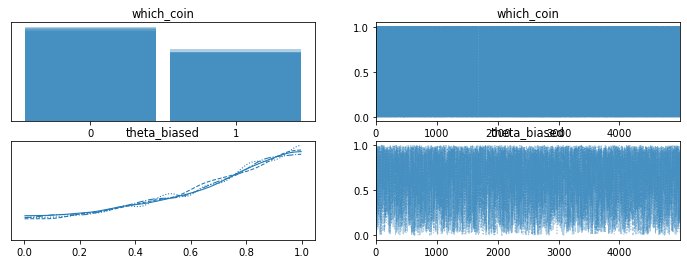

In [3]:
pm.traceplot(coin_trace)

In [6]:
print(f"p(coin=fair|HH)={coin_trace['which_coin'].mean()}")

p(coin=fair|HH)=0.4298


# Bayesian inference time series

In [7]:
da_points_solved = [47,55,39,36,27,37,31,33,39,38,20,52,36,40,10,41,42,11,20,15,26,30,11,22,25,19,51,29,17,29,39,30,54,35]
da_points = [82,68,64,45,27,48,43,46,52,46,39,59,55,59,35,65,61,18,27,37,38,42,34,27,30,37,51,36,30,42,47,47,62,57]

sw_points_solved = [8,11,6,6,12,12,7,15,13,6,17,12,3,11,6,7,6,9,10,0,0,6,17,16,19,9,15,10,14,8,24,17]
sw_points = [11,17,12,12,12,12,16,16,13,16,22,20,3,11,6,17,13,15,10,10,10,6,17,16,24,14,15,15,24,15,24,17]

In [8]:
# Build model
with pm.Model() as model:
    p_sw = pm.Beta('completion_rate_sw', alpha=1, beta=1)
    solved_sw = pm.Binomial('solved_points_sw', n=sw_points, p=p_sw, observed=sw_points_solved)
    
    p_da = pm.Beta('completion_rate_da', alpha=1, beta=1)
    solved_da = pm.Binomial('solved_points_da', n=da_points, p=p_da, observed=da_points_solved)
    
    diff = pm.Deterministic('diff', p_sw - p_da)
    
    trace = pm.sample(10000)

C:\Users\wallj\AppData\Local\Temp\ipykernel_20288\3515465777.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(10000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [completion_rate_da, completion_rate_sw]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 26 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\wallj\anaconda3\envs\pymc4\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


AttributeError: 'Line2D' object has no property 'varnames'

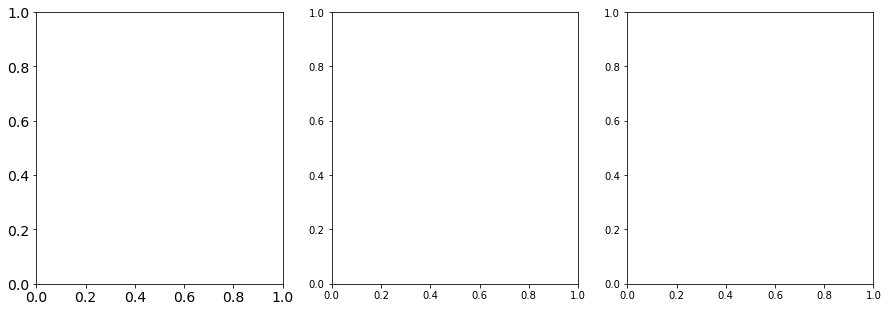

In [9]:
ax = pm.plot_posterior(trace, varnames=['completion_rate_sw', 'completion_rate_da'], figsize=(15,5))
ax[0].set_title('$p_{SW}$')
ax[1].set_title('$p_{DA}$');
pm.plot_posterior(trace, varnames=['diff'], ref_val=0, text_size=16, figsize=(7,5));
print('P(p_sw > p_da) = %.2f' % ((trace['diff'] > 0).mean()))